In [1]:
import tensorflow.keras
from tensorflow.keras.layers import Conv2D, Input, MaxPool2D, RandomRotation, RandomTranslation, RandomZoom, Dropout, Flatten, Dense
import numpy as np
from tensorflow.keras.datasets import mnist

In [2]:
# Загружаем данные
(x, y), (xt, yt) = mnist.load_data()
y=y%2
yt=yt%2

# Преобразуем метки из цифр в one hot ветора 6 -> [0,0,0,0,0,0,1,0,0,0]
y = tensorflow.keras.utils.to_categorical(y, 2)
# for j in range(len(y)):
#   for i in range (len(y[j])):
#     if y[j][i]==1:
#       if (i%2)==0:
#         y[j][i]=0
#         y[j][0]=1
#       else:
#         y[j][i]=0
#         y[j][1]=1
# #print (y)
yt = tensorflow.keras.utils.to_categorical(yt, 2)
# for j in range(len(yt)):
#   for i in range (len(yt[j])):
#     if yt[j][i]==1:
#       if (i%2)==0:
#         yt[j][i]=0
#         yt[j][0]=1
#       else:
#         yt[j][i]=0
#         yt[j][1]=1
# #print (yt)

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Основаня модель для классификации цифр
main_model = tensorflow.keras.Sequential([
    Input(shape=(28, 28, 1)),


    Conv2D(16, 3, padding='same', activation='relu'), # На выходе 16 картинок по 28 на 28 пикселей
    MaxPool2D(strides=2),                             # На выходе 16 картинок по 14 на 14 пикселей
    Conv2D(32, 3, padding='same', activation='relu'), # На выходе 32 картинок по 14 на 14 пикселей
    MaxPool2D(strides=2),                             # На выходе 32 картинок по 7 на 7 пикселей

    Flatten(),
    Dense(128, activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')   # <- здесь функция активации softmax, чтобы выходы были как вероятности от 0 до 1
])

In [4]:
main_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [5]:
main_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
# validation_split=0.2 - 20% обучающей выборки будет валидационной, т.е. сеть получит для обучения 80% примеров, а 20% будет отобрано для автоматической проверки распознования
main_model.fit(x, y, batch_size=60, epochs=3, validation_split=0.2)

Epoch 1/3
800/800 [==============================] - 38s 45ms/step - loss: 0.1915 - accuracy: 0.9561 - val_loss: 0.0431 - val_accuracy: 0.9846
Epoch 2/3
800/800 [==============================] - 35s 44ms/step - loss: 0.0420 - accuracy: 0.9856 - val_loss: 0.0390 - val_accuracy: 0.9871
Epoch 3/3
800/800 [==============================] - 36s 45ms/step - loss: 0.0275 - accuracy: 0.9903 - val_loss: 0.0455 - val_accuracy: 0.9872


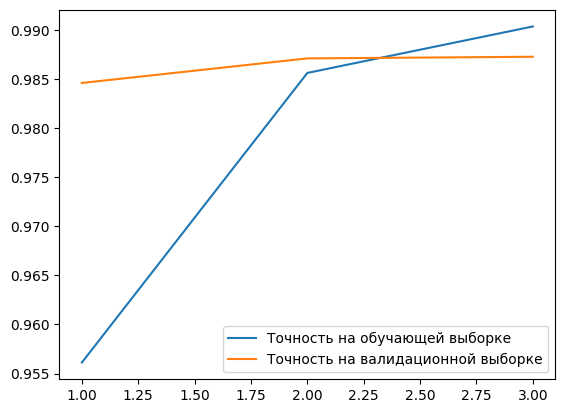

In [7]:
import matplotlib.pyplot as plt

hist = main_model.history.history

epoch_ind = range(1, len(hist['accuracy']) + 1)
plt.plot(epoch_ind, hist['accuracy'], label='Точность на обучающей выборке')
plt.plot(epoch_ind, hist['val_accuracy'], label='Точность на валидационной выборке')
plt.legend()

# accuracy - точность = правильно_распознано / всего_примеров

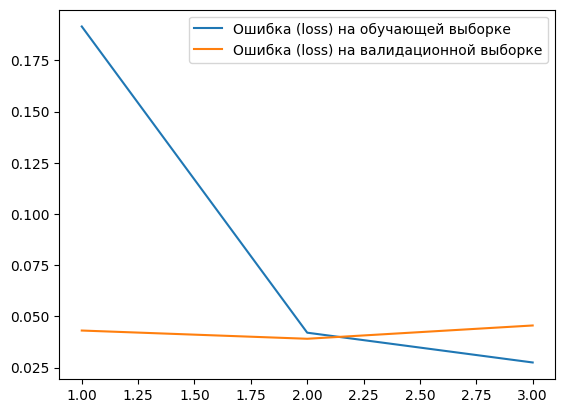

In [8]:
plt.plot(epoch_ind, hist['loss'], label='Ошибка (loss) на обучающей выборке')
plt.plot(epoch_ind, hist['val_loss'], label='Ошибка (loss) на валидационной выборке')
plt.legend()

In [9]:
# Проверяем работу модели на тестовой выборке
main_model.evaluate(xt, yt)

313/313 [==============================] - 6s 19ms/step - loss: 0.0371 - accuracy: 0.9886


[0.03712015226483345, 0.9886000156402588]

1/1 [==============================] - 0s 121ms/step
Предсказанное значение:  1
Реальное значение: 1
1/1 [==============================] - 0s 24ms/step
Предсказанное значение:  0
Реальное значение: 0
1/1 [==============================] - 0s 28ms/step
Предсказанное значение:  1
Реальное значение: 1
1/1 [==============================] - 0s 25ms/step
Предсказанное значение:  0
Реальное значение: 0
1/1 [==============================] - 0s 27ms/step
Предсказанное значение:  0
Реальное значение: 0
1/1 [==============================] - 0s 25ms/step
Предсказанное значение:  1
Реальное значение: 1
1/1 [==============================] - 0s 27ms/step
Предсказанное значение:  0
Реальное значение: 0
1/1 [==============================] - 0s 24ms/step
Предсказанное значение:  1
Реальное значение: 1
1/1 [==============================] - 0s 23ms/step
Предсказанное значение:  0
Реальное значение: 1
1/1 [==============================] - 0s 29ms/step
Предсказанное значение:  1
Реальное значение: 1

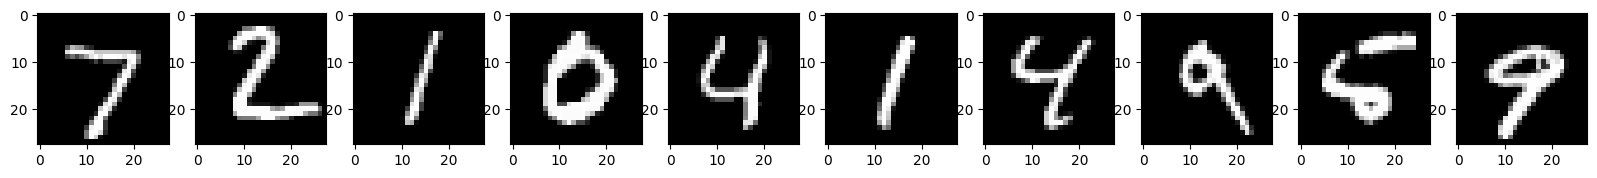

In [10]:
n = 10

plt.figure(figsize=(2*n, 2*2))

for i in range (n):
  ax = plt.subplot(2, n, i+1)#С помощью метода subplot() библиотеки matplotlib создается subplot, который располагается на i+n+1 позиции (где i - номер текущего изображения, n - количество изображений в ряду).
  plt.imshow(xt[i].reshape(28, 28), cmap='gray')#с помощью метода imshow() отображается декодированное изображение, которое хранится в переменной decoded_imgs[i].reshape(28, 28)
  a=np.argmax(main_model.predict(xt[i:i+1]))
  print('Предсказанное значение: ', a)
  print('Реальное значение:', np.argmax(yt[i]))